#1)Предварительная обработка данных:
   Нормализация: Масштабирование данных,нормализация пиксельных значений в диапазон [0, 1] 0-черный, 1- белый
#2)Архитектура сети:
  Один скрытый слой из 128 неиронов
#3)Функция активации:
  ReLU (Rectified Linear Unit)
#4)Метод регуляризации:
  Dropout: Регуляризация путем случайного отключения нейронов
#5)Метод оптимизации:
  SGD (Stochastic Gradient Descent)
#6)Параметр обучения:
  Эпохи: Количество проходов по всему датасету (20).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


5

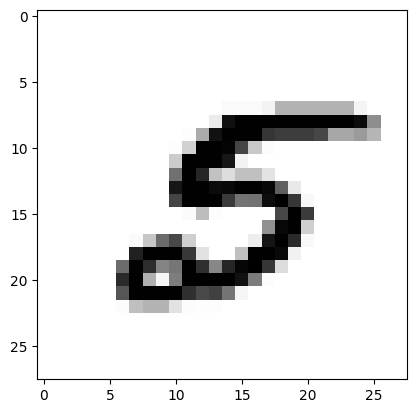

In [ ]:
#загрузка обучающей и тестовой выборки датасет
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#нормализация входных данных
x_train, x_test = x_train / 255.0, x_test / 255.0
#визуализация картинки с рук.цифрой из датасета
plt.imshow(x_train[5515].reshape((28, 28)), cmap='Greys')
y_train[5515]

#Создание модели неиронной сети
Sequential API модель многослойной Неиронной сети

In [ ]:
 model = tf.keras.models.Sequential ([
  #преобразование картинки в вектор из 784 єлементов
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #каждый элемент входного слоя связываем с неироном
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

#Loss функция

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=6)

#Компиляция модели

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=loss_fn,
              metrics=['accuracy'])

#Вывод параметров

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Обучение модели

In [ ]:
history = model.fit(x_train, y_train,epochs=20,validation_split=0.2,batch_size=32,callbacks=callback)

Epoch 1/20
1500/1500 [==============================] - 18s 10ms/step - loss: 0.7997 - accuracy: 0.7785 - val_loss: 0.3905 - val_accuracy: 0.8972
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4218 - accuracy: 0.8816 - val_loss: 0.3160 - val_accuracy: 0.9132
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3581 - accuracy: 0.8989 - val_loss: 0.2797 - val_accuracy: 0.9231
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3181 - accuracy: 0.9090 - val_loss: 0.2552 - val_accuracy: 0.9293
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2909 - accuracy: 0.9180 - val_loss: 0.2353 - val_accuracy: 0.9348
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.9242 - val_loss: 0.2193 - val_accuracy: 0.9407
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2511 - accuracy: 0.9280 - val_loss: 0.2082 - val_accurac

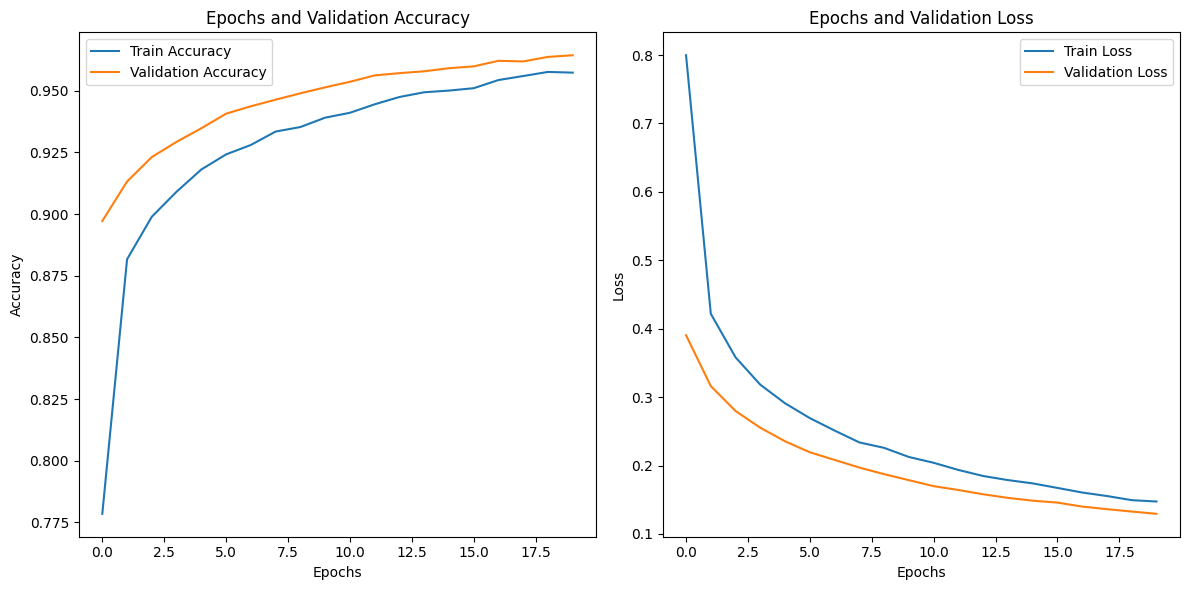

In [ ]:

# Построение графика Epochs and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs and Validation Accuracy')
plt.legend()

# Построение графика Epochs and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
